In [5]:
import pandas as pd
import pickle
import numpy as np

### Load Model

In [6]:
model_filename = "Result/with_val/NeuralNetwork_Model_Y2.pkl"
with open(model_filename, 'rb') as f:
    model = pickle.load(f)

### Load Data Test

In [7]:
test_filename = "Data Splitting/with_val/Test_Data.csv"

In [8]:
df = pd.read_csv(test_filename)
df.head()

,Berita,Label,Category_id,Word2Vec Vector
0,"['pria', 'perkosa', 'anak', 'kandung', 'hamil'...",keluarga,0,"[0.27046453952789307, 0.3322403132915497, 0.07..."
1,"['pria', 'aceh', 'utara', 'tangkap', 'perkosa'...",keluarga,0,"[0.3754759132862091, 0.34394609928131104, 0.04..."
2,"['pria', 'duga', 'leceh', 'anak', 'umur', 'rek...",orang asing,4,"[0.25263530015945435, 0.2340284287929535, 0.09..."
3,"['bocah', 'pontianak', 'bunuh', 'tiri', 'jasad...",keluarga,0,"[0.31271788477897644, 0.4681512117385864, 0.06..."
4,"['bejat', 'pemuda', 'pulau', 'sumenep', 'perko...",orang asing,4,"[0.2824190855026245, 0.3884829878807068, 0.092..."


In [9]:
df.shape

(98, 4)

### Processing The Data for Neural Network Input

In [10]:
# Get the locations
X_test = df['Word2Vec Vector']
y_test = df['Category_id']

In [11]:
# Convert string to float
X_test = np.array([list(map(float, row.strip("[]").split(','))) for row in X_test])
X_test = X_test.T

In [12]:
y_test = np.array(y_test)

In [13]:
# Make it suitable for my Neural Network input
print("Shape X_test: ", X_test.shape)
print("Shape y_test: ", y_test.shape)

Shape X_test:  (100, 98)
Shape y_test:  (98,)


### See the prediction and actual value

In [14]:
_, P, p_activation, Q, q_activation = model.forward(X_test)
predictions = np.argmax(q_activation, 0)

# show in dataframe with prediction and actual value
import pandas as pd
df = pd.DataFrame({'prediction': predictions, 'actual': y_test})
print(df)
df.to_csv("Prediction and Actual", index=False)

    prediction  actual
0            0       0
1            0       0
2            4       4
3            0       0
4            2       4
..         ...     ...
93           0       0
94           0       0
95           4       2
96           3       3
97           3       0

[98 rows x 2 columns]


### Result

In [15]:
# make confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [16]:
model_name = 'Y2'

Text(0.5, 1.0, 'Confusion Matrix of Model Y2')

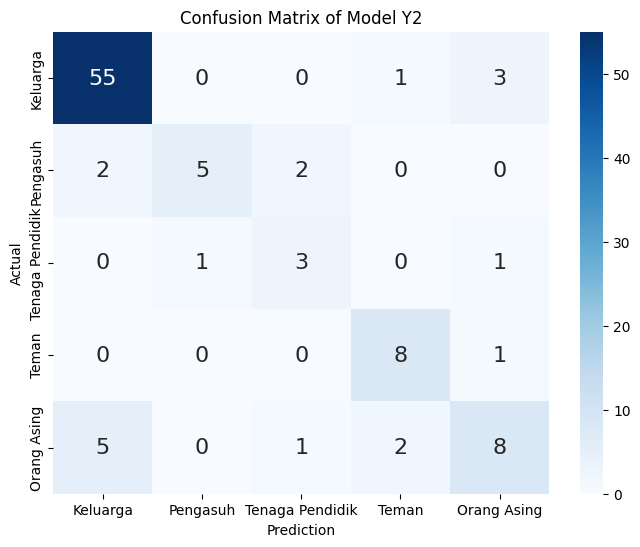

In [17]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
cat_code = {
    0: "Keluarga",
    1: "Pengasuh",
    2: "Tenaga Pendidik",
    3: "Teman",
    4: "Orang Asing"
}

# 80 : 20
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=cat_code.values(), yticklabels=cat_code.values(), cmap="Blues",
            annot_kws={"size": 16})
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Model ' + model_name)

In [18]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, predictions, target_names=cat_code.values())

print(class_report)

                 precision    recall  f1-score   support

       Keluarga       0.89      0.93      0.91        59
       Pengasuh       0.83      0.56      0.67         9
Tenaga Pendidik       0.50      0.60      0.55         5
          Teman       0.73      0.89      0.80         9
    Orang Asing       0.62      0.50      0.55        16

       accuracy                           0.81        98
      macro avg       0.71      0.70      0.69        98
   weighted avg       0.80      0.81      0.80        98



In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
f1 = f1_score(y_test, predictions, average=None)

print("Accuracy     :", accuracy)
print("Precision    :", precision)
print("Recall       :", recall)
print("F1-Score     :", f1)

Accuracy     : 0.8061224489795918
Precision    : [0.88709677 0.83333333 0.5        0.72727273 0.61538462]
Recall       : [0.93220339 0.55555556 0.6        0.88888889 0.5       ]
F1-Score     : [0.90909091 0.66666667 0.54545455 0.8        0.55172414]


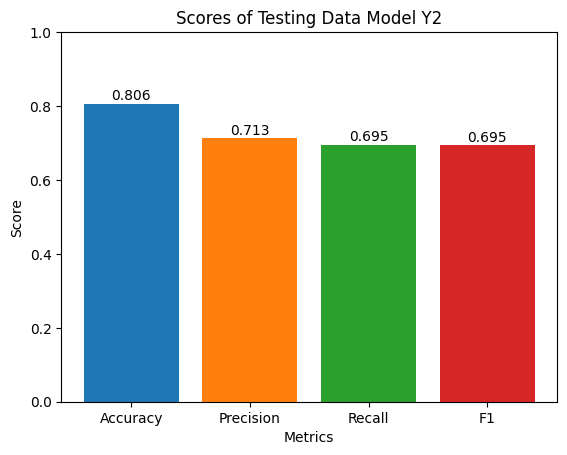

Scores of Testing Data Model Y2
Accuracy   : 0.8061224489795918
Precision  : 0.7126174900368449
Recall     : 0.6953295668549906
F1         : 0.6945872518286311


In [20]:
# plot each precision, recall, and F1 in one graph
precision_avg = np.mean(precision)
recall_avg = np.mean(recall)
f1_avg = np.mean(f1)

plt.bar(['Accuracy'], [accuracy])
plt.bar(['Precision'], [precision_avg])
plt.bar(['Recall'], [recall_avg])
plt.bar(['F1'], [f1_avg])

plt.ylim(0, 1)
plt.xlabel('Metrics')
plt.ylabel('Score')

plt.text('Accuracy', accuracy + 0.01, str(round(accuracy, 3)), ha='center')
plt.text( 'Precision', precision_avg + 0.01, str(round(precision_avg, 3)), ha='center')
plt.text('Recall', recall_avg + 0.01, str(round(recall_avg, 3)), ha='center')
plt.text('F1', f1_avg + 0.01, str(round(f1_avg, 3)), ha='center')
plt.title('Scores of Testing Data Model ' + model_name)
plt.show()

print('Scores of Testing Data Model ' + model_name)
print('Accuracy   :', accuracy)
print('Precision  :', precision_avg)
print('Recall     :', recall_avg)
print('F1         :', f1_avg)